# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

**Before beginning assignment, import needed modules and dataframe.**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
df = pd.read_csv('data/human_body_temperature.csv')
print(df.head())
print("Mean = " + str(np.mean(df['temperature'])))
print("Standard Deviation = " + str(np.std(df['temperature'])))
print("Number of samples = " + str(len(df['temperature'])))


   temperature gender  heart_rate
0         99.3      F        68.0
1         98.4      F        81.0
2         97.8      M        73.0
3         99.2      F        66.0
4         98.0      F        73.0
Mean = 98.24923076923075
Standard Deviation = 0.730357778905038
Number of samples = 130


## Q1:  Is the dataset Normal?

**Plot a histogram to view if data is normal**

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


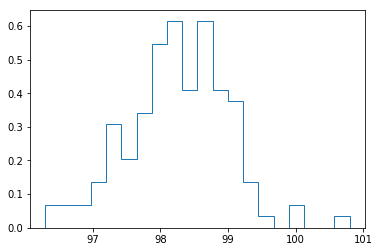

In [7]:
plt.hist(df['temperature'], bins=20, normed = True, histtype = 'step')
plt.show()

It is hard to determine normality from the plot and it looks to suffer from some binning bias, so will try plotting a CDF

**Define an expected cumulative distribution function**

In [66]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n =len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

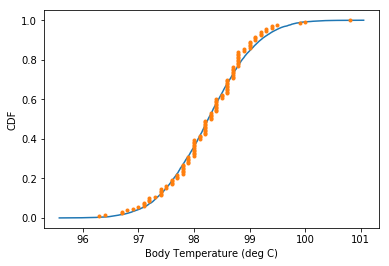

In [67]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])


# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)

# Get the CDF of the samples and of the data
x_theor, y_theor = ecdf(samples)
x,y = ecdf(df['temperature'])


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Body Temperature (deg C)')
_ = plt.ylabel('CDF')

The datapoints fit nicely on the theoretical CDF line, so this data looks normal.

One additional test to try is using scipys normaltest function

In [68]:
from scipy import stats
a=df['temperature']
k,p=stats.mstats.normaltest(a) # k = z-score returned by skewtest and k is the z-score returned by kurtosistest. p= p-value

print(k,p)
# we use p value to test if the variable is normal or not
if p<0.05:
  print('data is not normal')
else:
  print('data is normal')

2.703801433319203 0.2587479863488254
data is normal


## Q2: Is the sample large?

The sample size is 130.  The CLT holds well for sample sizes greater then 30; therefore the sample size can be considered large in this application.

According to dummies.com:  
"The Central Limit Theorem (CLT for short) basically says that for non-normal data, the distribution of the sample means has an approximate normal distribution, no matter what the distribution of the original data looks like, as long as the sample size is large enough (usually at least 30) and all samples have the same size"



The following equation can also used to determine required sample sizes if varying confidence intervals are required for the Z score:  

$$Necessary Sample Size = (Z-score)^2 * StdDev*(1-StdDev) / (margin of error)^2$$



90% – Z Score = 1.645  
95% – Z Score = 1.96  
99% – Z Score = 2.576  

https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-are-the-differences-between-one-tailed-and-two-tailed-tests/



In [69]:
#Calculate sample size: 
size = (len(df['temperature']))

#Calculate standard deviation
std = np.std(df['temperature'])

#Calculate necessary sample size (NSS), assuming a 95% confidence level (Z Score = 1.96) with a 5% margin of error:
NSS_a = (1.96**2*std*(1-std))/(0.05**2)
NSS_aa = (1.96**2*std*(1-std))/(0.1**2)
NSS_b = (1.645**2*std*(1-std))/(0.05**2)
NSS_bb = (1.645**2*std*(1-std))/(0.1**2)

print('The human temperature sample size is: ' + str(size))
print('The necessary sample size for a 95% confidence level and a 5% margin of error is ' + str(round(NSS_a,0)))
print('The necessary sample size for a 95% confidence level and a 10% margin of error is ' + str(round(NSS_aa,0)))
print('The necessary sample size for a 90% confidence level and a 5% margin of error is ' + str(round(NSS_b,0)))
print('The necessary sample size for a 90% confidence level and a 10% margin of error is ' + str(round(NSS_bb,0)))

The human temperature sample size is: 130
The necessary sample size for a 95% confidence level and a 5% margin of error is 303.0
The necessary sample size for a 95% confidence level and a 10% margin of error is 76.0
The necessary sample size for a 90% confidence level and a 5% margin of error is 213.0
The necessary sample size for a 90% confidence level and a 10% margin of error is 53.0


**As we can see, the required sample size is dependent on what is required.  We have a sample size large  enough for a 95% confidence level with a 10% margin of error, but not a 5% margin of error.**

##  Q3: Is the true population mean really 98.6 degrees F?

**The mean of the 130 samples is 98.2491, which is slightly different then 98.6.  To determine if the true population of the mean is possibly (to 95% confidence), both bootstrap and freqentist test will be performed. **
  


## Bootstrap test

**Ten thousand replicates will be created from our dataset.  For each replicate, the difference from 98.6 will be calculated and a new distribution will be created which contains difference from means. The hypothesized mean of 98.6 will be added to the distribution.  If the mean of the human body temperature really is 98.6, then the mean of this distribution should also be about 98.6. **

**Define applicable functions**

In [12]:
def diff_from_mean(data, diff= 98.6):
    return np.mean(data) -diff


def bootstrap_replicate_1d(data, func): 
#""Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample) 

#Define bootstrap replicates function
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

**Perform bootstrap and calculate 95% confidence interval.* 

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


0


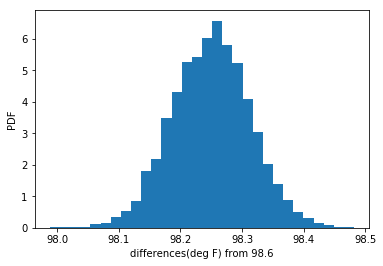

In [75]:
#np.random.choice(df['temperature'], size=len(df['temperature']))

HypMean = 98.6
##diff_observed = diff_from_mean(np.mean(df['temperature']))
##print(diff_observed)

# Make an array of translated temps
translated_temp = df['temperature'] - np.mean(df['temperature']) + HypMean
#plt.plot(translated_temp)

# Take bootstrap replicates of  translated temps
#bs_replicates = draw_bs_reps(translated_temp, diff_from_mean, 10000)
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)

# Compute fraction of replicates that are less than the observed difference


#print(diff_observed)

_ = plt.hist(bs_replicates, bins=30, normed=True)
_ = plt.xlabel('differences(deg F) from 98.6')
_ = plt.ylabel('PDF') 

value = stats.norm.ppf(.95)




**Calculate p value**

In [77]:
p = (np.sum(bs_replicates >= 98.6))
print(p)

0


The p value is 0 because no value in the distribution is greater then 98.6, indicating a mean of 98.6 is actually very rare**

**Now calculate the confidence interval:**

In [14]:
conf_int = np.percentile(bs_replicates, [2.5, 0.5, 97.5])
print("The confidence interval is: " + str(conf_int))
print("THis means that at the 95% confidence interval, the mean of the dataset lies from " + str(np.mean(df['temperature']) - conf_int[1]) + " to " +  str(np.mean(df['temperature']) + conf_int[1]) + " deg F.")

The confidence interval is: [98.12153846 98.08153846 98.37461538]
THis means that at the 95% confidence interval, the mean of the dataset lies from 0.16769230769229182 to 196.3307692307692 deg F.


**Therefore, we can reject the hypothesis that the mean is 98.6.**

### Now try frequentist z test
** A z value can be calculated with the following equation:**  $$z = \frac{\overline{X} - \mu}{\sigma\sqrt{n}} $$  

**The z test is most appropriate test in this situation (as opposed to t test). Since the sample size is large (n>=30), we can use the sample size standard deviation as good approximation to the population standard deviation** 


**H0: 98.6 is the sample mean**  
**H1  98.6 is not the sample mean**

**This will be two tailed test**

In [71]:
mu = 98.6
Xbar = np.mean(df['temperature'])
S = np.std(df['temperature'])
n = len(df['temperature'])


#import scipy.stats
from statsmodels.stats import weightstats as stests
import numpy as np

#data=np.random.normal(loc=3.4,scale=0.1,size=100)
#singleValue=3.3

# Assuming data are normally distributed, we can do z-test
testResult=stests.ztest(df['temperature'],value=98.6)

pValue=testResult[1]
print("p-value is: "+str(pValue) + " with a z score of: "+ str(testResult[0]))
print("")


p-value is: 4.9021570141012155e-08 with a z score of: -5.4548232923645195



**The p value is extremely small (<0.05) so we reject the hypothesis that the mean is 98.6.**

### Now try frequentist t test

**A t value can be calculated with the following equation:**  $$t = \frac{\overline{X} - \mu}{S\sqrt{n}} $$
**Critical values of the t distribution with 130 degrees of freedom: ** 
**t<sub>0.05</sub> = 1.658**
**t<sub>-0.05</sub> = -1.658**
**t<sub>0.1</sub> = 1.289** 
**t<sub>-0.1</sub> = -1.289** 
  
**Plugging in our known values, we get:**  $$t= \frac{98.6-98.249}{0.0329*11.4}$$  

**Doing the calculations:  **







In [17]:
import scipy.stats
mu = 98.6
Xbar = np.mean(df['temperature'])
S = np.std(df['temperature'])
n = len(df['temperature'])
print(S)
        
t= (Xbar - mu)/(S-np.sqrt(n))
print("t = " + str(t))

p = stats.ttest_1samp(df['temperature'], 98.6)
print("p value using stats model Ttest_1sampleResult = " + str(p))

0.730357778905038
t = 0.03287004017578845
p value using stats model Ttest_1sampleResult = Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


**The p value is still extremely small, but is slightly larger then p value calculated with the z test.  This indicates that the the t test has less confidence.  This would be expected as the t distribution has wider tails then the z distribution.**

## Q4. Draw a small sample of size 10 from the data and repeat both frequentist tests.
* **Which one is the correct one to use?**
* **What do you notice? What does this tell you about the difference in application of the  tt  and  zz  statistic?**

**Draw 10 random samples from our dataset**

In [70]:
import random
small_sample = random.sample(df['temperature'].tolist(), 10)
print(small_sample)

[98.5, 98.4, 98.0, 98.6, 97.6, 97.9, 98.4, 98.6, 98.7, 97.8]


**Here, the t test is most appropriate because of a small sample size as the sample standard deviation may not be an accurate estimate of the population standard deviation.**

### Perform t test

In [19]:
import scipy.stats
mu = 98.6
Xbar = np.mean(small_sample)
S = np.std(small_sample)
n = len(small_sample)
print(S)
        
t= (Xbar - mu)/(S-np.sqrt(n))
print("t = " + str(t))

p = stats.ttest_1samp(small_sample, 98.6)
print("p value using stats model Ttest_1sampleResult = " + str(p))

0.6372597586541929
t = 0.1069299349672214
p value using stats model Ttest_1sampleResult = Ttest_1sampResult(statistic=-1.2710672359267698, pvalue=0.23557217913478867)


**The p value is greater then 0.05 so we fail to reject the hypothesis that the mean is 98.6 at the 95% confidence level.**

### Also perform z test

In [20]:
mu = 98.6
Xbar = np.mean(small_sample)
S = np.std(small_sample)
n = len(small_sample)

def twoSampZ(X1, X2, mudiff, sd1, sd2, n1, n2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    pooledSE = sqrt(sd1**2/n1 + sd2**2/n2)
    z = ((X1 - X2) - mudiff)/pooledSE
    pval = 2*(1 - norm.cdf(abs(z)))
    return round(z, 3), round(pval, 4)

#import scipy.stats
from statsmodels.stats import weightstats as stests
import numpy as np

#data=np.random.normal(loc=3.4,scale=0.1,size=100)
#singleValue=3.3

# Assuming data are normally distributed, we can do z-test
testResult=stests.ztest(small_sample,value=98.6)
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")


p-value is: 0.20370473010472112



**The p value for the t test is much larger (and would indicate that the mean is not 98.6).  This would be expected as the t distribution has more spread at the tails than the z distribution.  The z distribution can have a tighter distribution as more accurate knowledge about the distribution is known - namely a good population standard deviation (which can be accurately estimated with the sample standard deviation with a normal distribution).  However, the z test is not appropriate due to the small sample size.**

##  Q5. At what temperature should we consider someone's temperature to be "abnormal"?
* **As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.**
* **Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws**

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


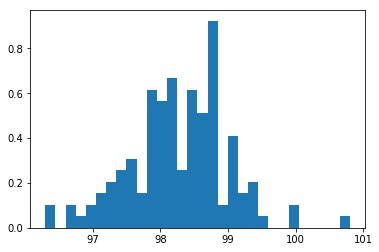

In [21]:
_ = plt.hist(df['temperature'], bins=30, normed=True)

### Bootstrap #1 - draw 10000 means using draw_bs_reps
**Here 10000 replicates of the data will be created, and a mean of each replicate will be found.  This will create a distribution of means for which a confidence interval can be calculated.  This would be indicative of what a "normal" range of human body temperatures would be**

c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


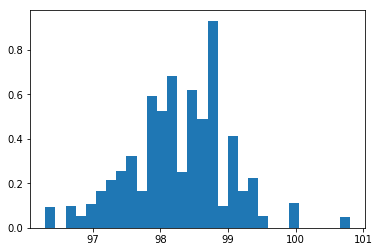

Mean is of bootstrap distribution is: 98.2549 compared to the actual datset mean of 98.24923076923075
Standard Deviation is: 0.7340585739571466 compared to the actual datset standard deviation of 0.730357778905038


In [64]:
bs_replicates = draw_bs_reps(df['temperature'], np.mean, 10000)
_ = plt.hist(bs_replicates, bins=30, normed=True)
plt.show()
print("The mean is of bootstrap distribution is: " + str(np.mean(bs_replicates)) + " compared to the actual datset mean of "+ str(np.mean(df['temperature'])))
print("The standard Deviation is: " + str(np.std(bs_replicates)) + " compared to the actual datset standard deviation of "+ str(np.std(df['temperature'])))


In [54]:
conf_int1 = np.percentile(bs_replicates, [2.5, 97.5])
std_err = sigma/np.sqrt(1)
moe = 1.959*std_err
                                    
print("95% of the population should fall within "+ str(conf_int1[0]) + " to " + str(conf_int1[1]) +" deg F.")
print("The margin of error  is: " + str(moe))

95% of the population should fall within 98.12461538461538 to 98.3753846153846 deg F.
The margin of error  is: 0.12542128935479363


### Bootstrap #2 - create normal distribution with same mean and std as dataset
**Here a normal distribution with the same mean and standard deviation of the dataset will be created using np.random.normal..  This will create a distribution of means for which a confidence interval can be calculated.  This would be indicative of what a "normal" range of human body temperatures would be, assuming that the dataset is representative of the population**

98.24923076923075 0.730357778905038


c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


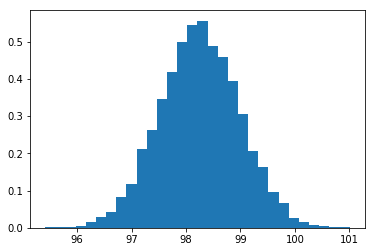

The mean is of bootstrap distribution is: 98.24722882870105 compared to the actual datset mean of 98.24923076923075
The standard Deviation is: 0.7302179408501276 compared to the actual datset standard deviation of 0.730357778905038


In [78]:
# Compute mean and standard deviation: mu, sigma
mu = np.mean(df['temperature'])
sigma = np.std(df['temperature'])
print(mu, sigma)

# Sample out of a normal distribution with this mu and sigma: samples
samples = np.random.normal(mu, sigma, 10000)
_ = plt.hist(samples, bins=30, normed=True)
plt.show()
print("The mean is of bootstrap distribution is: " + str(np.mean(samples)) + " compared to the actual datset mean of "+ str(np.mean(df['temperature'])))
print("The standard Deviation is: " + str(np.std(samples)) + " compared to the actual datset standard deviation of "+ str(np.std(df['temperature'])))

In [58]:
conf_int2 = np.percentile(samples, [2.5, 97.5])
std_err2 = sigma/np.sqrt(1)
moe2 = 1.959*std_err2
                                    
print("95% of the population should fall within "+ str(conf_int2[0]) + " to " + str(conf_int2[1]) +" deg F.")
print("The margin of error  is: " + str(moe2))

95% of the population should fall within 96.79915599004018 to 99.66058830871971 deg F.
The margin of error  is: 1.4307708888749693


## Try frequentist test

**A z score can be calculated with the following equation:**  $$z = \frac{\overline{X} - \mu}{S\sqrt{n}} $$
**To estimate the mean of a single draw (n =1), knowing that the z score associated with 95% confidence interval is 1.959, we solve for X:
$$\overline{X} = 1.959*S+\mu$$

In [79]:
mu = df['temperature'].mean()
sigma = np.std(df['temperature'])
std_err = sigma/np.sqrt(1)
moe = 1.959*std_err
print(-1.959*sigma+mu, 1.959*sigma+mu)
print(np.percentile(df['temperature'], [2.5, 97.5]))


print("95% of the population should fall within "+ str(-1.959*sigma+mu,) + " to " + str(1.959*sigma+mu) +" deg F.")
print("The margin of error  is: " + str(moe2))

96.81845988035577 99.68000165810572
[96.7225 99.4775]
95% of the population should fall within 96.81845988035577 to 99.68000165810572 deg F.
The margin of error  is: 1.4307708888749693


## Q6. Is there a significant difference between males and females in normal temperature?
* **What testing approach did you use and why?**
* **Write a story with your conclusion in the context of the original problem.**

**Take a look at the statistics of the male vs female temperatures:**

In [182]:
print(df['temperature'][df.gender == 'M'].describe())
print(df['temperature'][df.gender == 'F'].describe())

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64
count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64


**In the sample, female temperatures look to be about 0.4 deg F higher then males.  The question is whether or not the population temperature differences found in males vs females is statistically significant.  One way to determine this is to check to see whether the means of the two population distributions are similar enough such that the means of one distribution fall within 95% confidence intervals of the other distribution.  I like the simplicity of finding confidence intervals with the bootstrapping method, so will try that first.**

**Here, two bootstrap distributions are generated - one for the male temperatures and one for female temperatures.  These will represent the population from which our sample data was chosen.

In [40]:
bs_replicates_m = draw_bs_reps(df['temperature'][df.gender == 'M'], np.mean, 100000)
bs_replicates_f = draw_bs_reps(df['temperature'][df.gender == 'F'], np.mean, 100000)


c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
c:\users\rapp\appdata\local\programs\python\python36-32\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


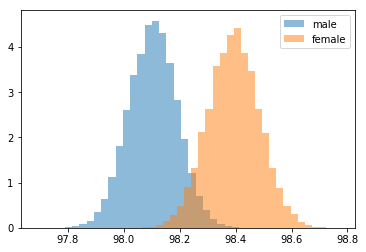

In [39]:
_ = plt.hist(bs_replicates_m, bins=30, normed=True, alpha = 0.5, label = "male")
_ = plt.hist(bs_replicates_f, bins=30, normed=True, alpha = 0.5, label = "female")
plt.legend()

In [73]:
conf_int_m = np.percentile(bs_replicates_m, [2.5, 97.5])
conf_int_f = np.percentile(bs_replicates_f, [2.5, 97.5])

print(conf_int_m)

print("The mean of the male dataset is: " +str(np.mean(df['temperature'][df.gender == 'M'])))
print("95% of the male temperature dataset lies between " \
      + str(conf_int_m[0]) + " and " +  str(conf_int_m[1]) + " deg F.")

print("The mean of the female dataset is: " +str(np.mean(df['temperature'][df.gender == 'F'])))
print("95% of the female temperature dataset lies between " \
      + str(conf_int_f[0]) + " and " +  str(conf_int_f[1]) + " deg F.")

[97.93538462 98.27076923]
The mean of the male dataset is: 98.10461538461537
95% of the male temperature dataset lies between 97.9353846153846 and 98.27076923076923 deg F.
The mean of the female dataset is: 98.39384615384614
95% of the female temperature dataset lies between 98.21538461538461 and 98.5753846153846 deg F.


**The mean of of the male temperature distribution does not fall within the 95% confidence intervals of the female mean temperature distribution.  Also, the mean female temperature does not fall within the 95% confidence intervals of the male mean temperature distribution.  Therefore, we can say that there is a significance difference between the male and female temperature.**

### Perform z test


**H0: the mean male temperature equals the mean female temperature**  

**H1: The hypothesis is that mean male temperature is not equal to the female temperature**

In [37]:
testResult=stests.ztest(df['temperature'][df.gender == 'M'],df['temperature'][df.gender == 'F'])
pValue=testResult[1]
print("The p-value is: "+str(pValue) + " with a z score of: "+ str(testResult[0]))
print("")

The p-value is: 0.02228736076065755 with a z score of: -2.2854345381656103



In [193]:
testResult=stests.ztest(df['temperature'][df.gender == 'F'],df['temperature'][df.gender == 'M'])
pValue=testResult[1]
print("p-value is: "+str(pValue))
print("")

p-value is: 0.02228736076065755



The p value is less then 0.05, so we reject the null hypothesis that the two datasets have the same mean temperatures